# UNIVARIATE ANALYSIS (NHANES)

In this notebook , I uploaded NHANES dataset of 2015-2016 cycle and applied univariate analysis using python programming language with the help of datascience libraries.

In [1]:
#first of all import all essential libraries for this project
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#now load the dataset which was given in CSV file into this notebook.
#then using read_csv method to read this file.

In [4]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1475803788e34729b1831b3dede7590b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mAyyHvmJPRwE1fDBud7vGyjCphI_WGR2xyDBXalx0836',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1475803788e34729b1831b3dede7590b.get_object(Bucket='pythonlibraries-donotdelete-pr-9jkhobn7lvjxhd',Key='nhanes_2015_2016.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0



as in above table, there are so many rows and columns so we can make a frequency chart for above table t get the count of similar values.


# Frequency Chart / Table

The value_counts method can be used to determine the number of times that each distinct value of a variable occurs in a data set. In statistical terms, this is the "frequency distribution" of the variable. Below we show the frequency distribution of the DMDEDUC2 variable, which is a variable that reflects a person's level of educational attainment. The value_counts method produces a table with two columns. The first column contains all distinct observed values for the variable. The second column contains the number of times each of these values occurs. Note that the table returned by value_counts is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

The numbers 1, 2, 3, 4, 5, 9 seen below are integer codes for the 6 possible non-missing values of the DMDEDUC2 variable. The meaning of these codes is given in the NHANES codebook located here, and will be discussed further below. This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [6]:
df.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

Some time it is not convenient that both column in frequency table in the form of numbers and we know that the column DMDEDUC2 is for educational level of people so convert numeric form with the respective lables(educational). 
By using replace method

In [8]:
df['DMDEDUC2'] = df.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df.DMDEDUC2.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2, dtype: int64

Value_counts method does not include the NaN and missing value so for finding the count of missing values we can use following methods.

In [12]:
df.DMDEDUC2.value_counts().sum() #counts excluding missing and nan values.

5474

In [13]:
print(df.shape)#total number of rows and columns in dataset.

(5735, 28)


So 5735-5474 that is 261 values are missing.

In [15]:
# we can check it by isnull().
pd.isnull(df.DMDEDUC2).sum()

261

In our dataset gender that is RIAGENDR is also in numeric form so converting it into male and female like this.

In [17]:
df['RIAGENDR'] = df.RIAGENDR.replace({ 1 :'male' , 2: 'female'})
df.RIAGENDR.value_counts()

female    2976
male      2759
Name: RIAGENDR, dtype: int64

Sometimes it is convenient to see the numeric data as proportion.

In [20]:
x = df.DMDEDUC2.value_counts()
x = x/x.sum()
print(x)

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2, dtype: float64


In [24]:
#including missing values.fillna()
df['DMDEDUC2'] = df.DMDEDUC2.fillna("missing")
x = df.DMDEDUC2.value_counts()
x = x/x.sum()
print(x)


Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
missing            0.045510
Don't know         0.000523
Name: DMDEDUC2, dtype: float64


# Numerical Summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the describe data frame method. Below we demonstrate how to do this using the body weight variable (BMXWT). As with many surveys, some data values are missing, so we explicitly drop the missing cases using the dropna method before generating the summaries.

In [39]:
df.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

It's also possible to calculate individual summary statistics from one column of a data set. This can be done using Pandas methods, or with numpy functions:

In [40]:
x = df.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [41]:
np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))

0.3741935483870968

Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure

In [42]:
np.mean((df.BPXDI1 >= 80) & (df.BPXDI2 <= 89))


0.14803836094158676

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

Since the combined systolic and diastolic condition for pre-hypertension is somewhat complex, below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [52]:
a = np.mean((df.BPXSY1 >= 120) & (df.BPXSY2 <= 139))
b = np.mean((df.BPXDI1 >= 80) & (df.BPXDI2 <= 89))
print(np.mean(a or b))

0.3741935483870968


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [53]:
print(np.mean(df.BPXSY1 - df.BPXSY2))
print(np.mean(df.BPXDI1 - df.BPXDI2))

0.6749860309182343
0.3490407897187558


# Graphical Summaries

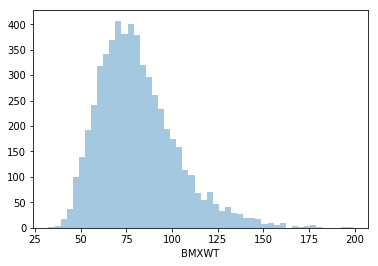

In [57]:
sns.distplot(df.BMXWT.dropna() , kde = False)

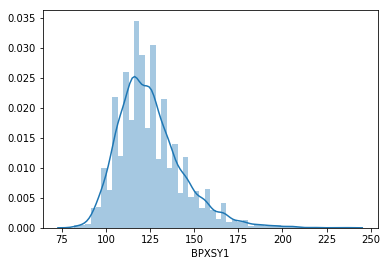

In [58]:
sns.distplot(df.BPXSY1.dropna())

To compare several distributions, we can use side-by-side boxplots. Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements (BPXDI1, BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements. Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement. This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

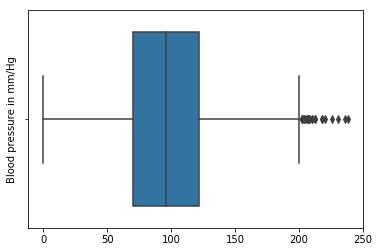

In [63]:
bp = sns.boxplot(df.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

# Stratification

One more way to extract information using data set is to covert in strata.. It is nothing but a subset of some elemnt of our dataset...when dealing with humanastuc data it is advantageous to do stratification on demographic factors such as race, sex, height etc..

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age. To see this trend in the NHANES data, we can partition the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum. Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data. Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

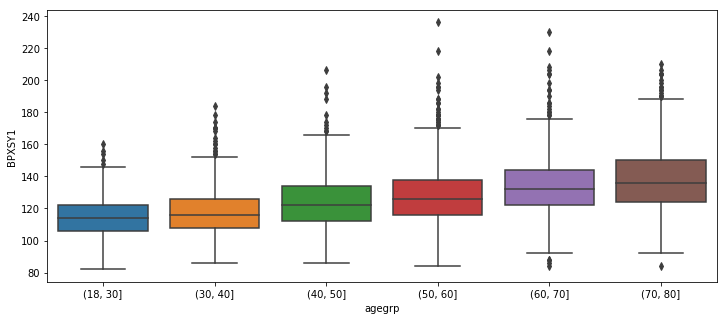

In [66]:
df["agegrp"] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=df)  # Make boxplot of BPXSY1 stratified by age group

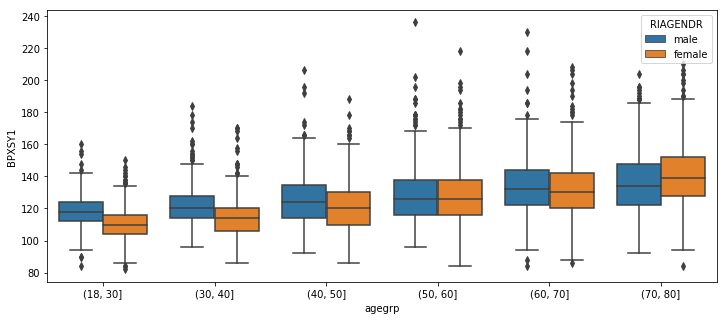

In [74]:
plt.figure(figsize=(12,5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDR" ,data=df)

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands. Each approach highlights a different aspect of the data.



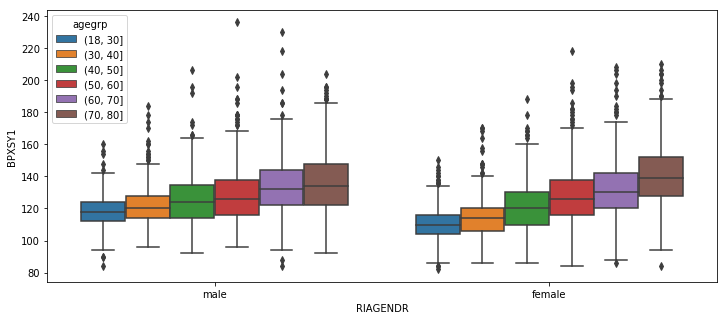

In [76]:
plt.figure(figsize=(12,5))
sns.boxplot(x="RIAGENDR", y="BPXSY1", hue="agegrp" ,data=df)

Stratification can also be useful when working with categorical variables. Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands. While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates.

In [78]:
#Now see the result using groupby method.
df.groupby("agegrp")["DMDEDUC2"].value_counts()


agegrp    DMDEDUC2       
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

# Conclusion ( Overall Summary)

First of all import all essential libraries, then read the dataset which was given in CSV (COMMA SEPERATED VALUES) with the help og read_csv().
In frequency table ,I use value_counts () and deals with NaN, missing values and change the numeric data into labels for convenient view using replace().
In numerical summarization section, we use describe() and use different pandas and numpy functions like sum, mean, quantile ,percentile etc.
In graphical summarization we made histograms, boxplots and boxplots with between two aspects.
At the end we view the data using groupby() in agegrp and DMDEDUC2(education).

Thanking You.

kavyansh Pandey